In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_data_export(datafile, plot=True):
    data = pd.read_csv(f'data/{datafile}')
    data_grouped = data.groupby('iteration').agg(['mean', 'std', 'count'])
    data_export = data.groupby('iteration').mean()
    column_names = data_grouped.droplevel(axis=1, level=1).columns.unique().tolist()
    for col in column_names:
        mean = data_grouped[col, 'mean']
        std = data_grouped[col, 'std']
        count = np.sqrt(data_grouped[col, 'count'])

        ci =  1.64 * std / count # 90% confidence interval
        ci_lower = mean - ci
        ci_upper = mean + ci
        mean = data_grouped[col, 'mean']

        data_export[col+'_ci'] = ci

    if plot:
        _, ax = plt.subplots(1,1,figsize=(10,7))
        for col in column_names:
            x = data_export.index
            y = data_export[col]
            ax.plot(x, y, label=col);
            ax.fill_between(
                x, data_export[col]-data_export[col+'_ci'], data_export[col]+data_export[col+'_ci'], alpha=.15
            );
            ax.legend();

    data_export.to_csv('export.csv', sep='\t')
    return data_export



In [2]:
data_sum_rate_list = []
iter_range = range(2,22,2)
for i in iter_range:
    if i == 10:
        data_export = get_data_export(f'dependent_dependent_iter50_txA5_txB5.csv', plot=False)
    else:
        data_export = get_data_export(f'dependent_dependent_iter50_txA5_txB5_rx{i}.csv', plot=False)
    data_sum_rate_slice = data_export.sum()[['wmmse', 'wmmse_local', 'wmmse_sc']] / data_export.shape[0] 
    data_sum_rate_list.append(data_sum_rate_slice)

data_sum_rate = pd.concat(data_sum_rate_list, axis=1).transpose()
data_sum_rate['links'] = np.array(iter_range)*10

,wmmse,wmmse_sc_uncons,wmmse_sc,wmmse_center,wmmse_random,wmmse_ci,wmmse_sc_uncons_ci,wmmse_sc_ci,wmmse_center_ci,wmmse_random_ci
iteration,,,,,,,,,,
0,142.875093,142.875093,142.436350,142.875093,139.476792,4.234104,4.234104,4.420521,4.234104,5.198017
1,131.940266,131.940266,131.515085,130.491274,127.202289,4.211822,4.211822,4.311788,4.687201,6.321606
2,133.111757,133.111757,132.723409,127.271043,130.589100,4.697526,4.697526,4.773529,6.506623,5.164382
3,134.123536,134.123536,133.645945,127.212759,127.260327,4.872890,4.872890,4.925024,6.562564,6.872073
4,135.639726,135.639726,134.714424,124.249056,128.924386,5.294365,5.294365,5.473807,7.689498,7.028681
...,...,...,...,...,...,...,...,...,...,...
495,256.481910,256.481910,284.283468,248.194363,224.715387,12.292275,12.292275,13.950330,13.266229,11.726670
496,256.552352,256.552352,284.334873,248.291595,224.846447,12.295177,12.295177,13.952234,13.274847,11.727931
497,256.621368,256.621368,284.385404,248.387565,224.978144,12.297862,12.297862,13.954265,13.283357,11.728842


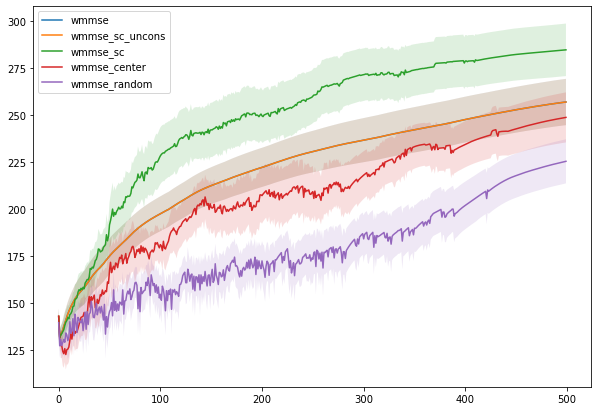

In [8]:
get_data_export('sc_tests_dependent_dependent_iter50_txA5_txB5_rx10.csv')

,wmmse,wmmse_local,wmmse_sc,wmmse_ci,wmmse_local_ci,wmmse_sc_ci
iteration,,,,,,
0,139.100901,137.615211,139.069788,5.136926,5.139358,5.131752
1,124.096557,116.863805,121.812860,4.574130,4.879880,5.072812
2,125.063743,117.716928,121.906019,5.036128,5.292491,5.364933
3,125.897059,118.000765,124.040046,5.163498,5.486544,5.357662
4,126.545544,118.761072,125.633752,5.411748,5.543170,5.580299
...,...,...,...,...,...,...
495,240.156298,200.764024,269.516331,14.344626,12.480433,18.756824
496,240.208971,200.798209,269.555319,14.346400,12.484162,18.756439
497,240.261358,200.832316,269.593926,14.348363,12.487884,18.756115


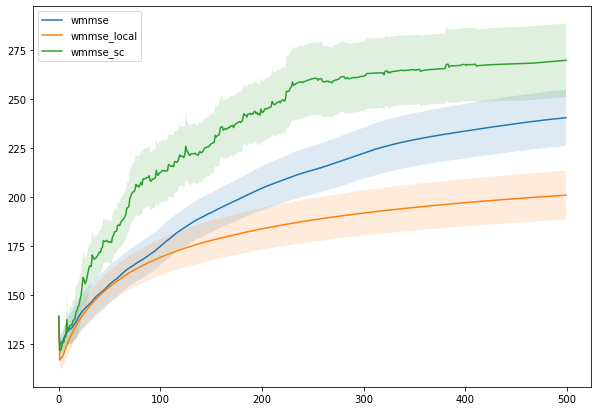

In [6]:
get_data_export('dependent_dependent_iter50_txA5_txB5.csv')

In [36]:
data_all = {}
iter_range = range(2,22,2)
for k in iter_range:
    if k == 10:
        data = pd.read_csv(f'data/dependent_dependent_iter50_txA5_txB5.csv')
    else:
        data = pd.read_csv(f'data/dependent_dependent_iter50_txA5_txB5_rx{k}.csv')
    i = 0
    length = 500
    data_list = []
    while i + length <= data.shape[0]:
        data_slice = data[i:i+length].sum()[['wmmse', 'wmmse_local', 'wmmse_sc']] / (length*k*10)
        data_list.append(data_slice)
        i += length
    data_all[k] = pd.concat(data_list, axis=1).transpose()

data_list = []
for k in iter_range:
    agg_k = data_all[k].agg(['mean', 'std', 'count']).transpose()
    agg_k['ci'] = 2.58 * agg_k['std']/agg_k['count'] # 99% confidence interval
    agg_k['ci_upper'] = agg_k['mean'] + agg_k['ci']
    agg_k['ci_lower'] = agg_k['mean'] - agg_k['ci']

    df_out = agg_k[['mean', 'ci', 'ci_lower', 'ci_upper']].stack()
    df_out.index = df_out.index.map('{0[0]}_{0[1]}'.format)
    df_out = df_out.to_frame().T
    df_out['links'] = k*10
    data_list.append(df_out)
data_export = pd.concat(data_list).reset_index(drop=True)
data_export.to_csv('export.csv', sep='\t', index=False)

In [37]:
data_export

,wmmse_mean,wmmse_ci,wmmse_ci_lower,wmmse_ci_upper,wmmse_local_mean,wmmse_local_ci,wmmse_local_ci_lower,wmmse_local_ci_upper,wmmse_sc_mean,wmmse_sc_ci,wmmse_sc_ci_lower,wmmse_sc_ci_upper,links
0,3.361212,0.041720,3.319492,3.402932,3.005541,0.044455,2.961086,3.049996,3.488725,0.049159,3.439566,3.537884,20
1,2.732569,0.029415,2.703153,2.761984,2.491277,0.032465,2.458812,2.523742,2.974396,0.042019,2.932377,3.016415,40
2,2.468925,0.025839,2.443086,2.494764,2.259464,0.024835,2.234628,2.284299,2.723381,0.035782,2.687600,2.759163,60
3,2.240080,0.024660,2.215419,2.264740,1.970549,0.026318,1.944231,1.996867,2.467450,0.032881,2.434569,2.500331,80
4,2.047770,0.024575,2.023194,2.072345,1.818807,0.023479,1.795328,1.842286,2.387128,0.033422,2.353705,2.420550,100
5,1.958235,0.022115,1.936120,1.980350,1.780375,0.024171,1.756204,1.804546,2.269421,0.032526,2.236895,2.301947,120
6,1.911121,0.018556,1.892565,1.929677,1.785282,0.020669,1.764613,1.805951,2.224556,0.028689,2.195867,2.253245,140
7,1.818839,0.018948,1.799891,1.837787,1.707085,0.022854,1.684231,1.729939,1.974124,0.030387,1.943738,2.004511,160
8,1.784433,0.019570,1.764863,1.804003,1.654658,0.020907,1.633751,1.675565,1.976836,0.029279,1.947557,2.006115,180
9,1.744025,0.019952,1.724073,1.763977,1.631768,0.020089,1.611679,1.651856,1.900618,0.023306,1.877312,1.923923,200
